# Random Number Generation

## T1. Monte Carlo Method를 이용한 $\pi$ 값 구하기
강의자료 - 확률이론 Review - 에서 설명한 Monte-Carlo Method를 이용한 $\pi$ 값 계산을  

1. estimate_PI() 함수를 완성하라
>* Parameter : N_total은 생성할 전체 point의 개수이다 
>* Return : Monte-Carlo Method에 의해 추정된 (Estimated) $\pi$ 값 
>* 참고 : Form input N_test는 estimate_PI() test를 위한 입력 값이다
>> [0,1) 사이의 random 값 생성을 위해 [numpy.random()](https://docs.python.org/dev/library/random.html#random.random) 사용할 수도 있다.
2. 여러 N 값들에 대해 다음의 예와 같은 그래프 그리기
>* Form input Ns로 주어지는 값들은 수행할 Monte-Carlo 실험 횟수다
>* 1.에서 작성한 estimate_PI() 함수를 사용하여 PI 값들을 구하고 아래 예와 같은 그래프를 그린다.
>* 그래프 x 축의 값이 log-scale임에 유의하라
>* 제목(Title)과 범례(legend)를 적용하여야 한다
>* 생성 random number에 따라 그래프의 모양은 다를 수 있다
![Example Graph](https://github.com/inetguru/IDS-CB35533/blob/main/monte_pi.png?raw=true)

---

* <font color="blue">numpy 이용 시 가능한 for, while loop을 쓰지 않고 계산하는 연습을 해보기 바랍니다. loop을 사용했다고 해서 감점을 하지는 않지만 numpy를 제대로 활용하는 것은 아님에 유의하기 바랍니다. 
* estimate_PI() 함수를 이용하여 Graph를 그릴 때 for loop을 사용하는 답의 예를 보였다. 다만 그 아래 주석 처리한 것 같이 이 역시 한 줄로 처리할 수도 있다. 물론 이는 numpy의 vectorization과 관계된 것은 아니며 실질적인 연산 효율 개선은 제한적이라고 할 수 있다
</font>

In [ ]:
import numpy as np
import scipy.stats as stats

def estimate_PI(N_total) :
  # scipy.stats을 이용하지 않고 numpy.random을 이용해서 생성할 수도 있음
  # Xs = np.random.random(N_total)
  # Ys = np.random.random(N_total)
  Xs = stats.uniform.rvs(size=N_total) 
  Ys = stats.uniform.rvs(size=N_total)

  #========== ENTER YOUR CODE ================= 
  #======== 수정 전/후 ===============
  #return 3.14
  return sum((Xs*Xs+Ys*Ys) < 1.0)/N_total*4
  #============================================

N_test = 1000 #@param {type:"integer"}
print(f'Estimated PI = {estimate_PI(N_test)}')

Estimated PI = 3.136


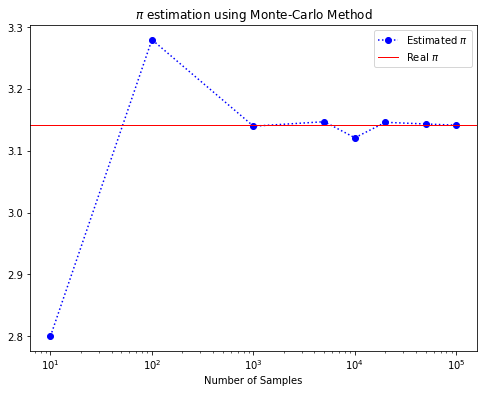

In [ ]:
import matplotlib.pyplot as plt
import math
Ns = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000] #@param {type:"raw"}

plt.rcParams['figure.figsize'] = [8,6]
#========== ENTER YOUR CODE ================= 
estimated_PI_values = []
for i in range(len(Ns)) :
  estimated_PI_values.append(estimate_PI(Ns[i]))

plt.semilogx(Ns, estimated_PI_values, 'b:o', label='Estimated $\pi$')

# A Simpler Version 
#plt.semilogx(Ns, list(map(estimate_PI, Ns)), 'b:o', label='Estimated $\pi$')

plt.axhline(y=math.pi, color='r', linewidth=1, label = 'Real $\pi$')

plt.title('$\pi$ estimation using Monte-Carlo Method')
plt.xlabel('Number of Samples')
plt.legend()

#============================================ 
plt.show()

## T2. Histogram의 Bins 이해
* 아래 그림은 Histogram에서 Bins의 의미와 속성을 개괄적으로 보이고 있다.

![figure](https://mk0codingwithmaxskac.kinstacdn.com/wp-content/uploads/2019/12/histogram-example-daily-steps-taken-annotated.png)

* Histogram과 관련한 다음 두 가지 함수의 Reference를 확인하고 사용법을 이해하라.
>* [numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html?highlight=histogram#numpy.histogram)
>* [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

* 우리는 주어진 Vals 값에 대해 Bins를 변경하며 두 개 histogram을 그리려 한다

#### **ax1**
1. bin의 수가 9개인 히스토그램을 ax1에 그려라. 
2. 2번째 bin 구간의 범위 [b2_start,b2_end)라 할 때 시작 값이 b2_start와 끝 값인 b2_end 값을 구하라 : 
> * b2_start = <font color='blue'>1.7</font>
> * b2_end = <font color='blue'>2.7</font>
3. Vals[5]인 2.7은 몇 번째 bin에 속하는가? <font color='blue'>3</font>

#### **ax2**
1. Bins 구분 값을 [0.0, 2.0, 3.0, 6.0, 10.0]로 하여 히스토그램을 ax2에 그려라.

다음은 기대하는 결과 그래프의 모습이다. 

![histogram](https://github.com/inetguru/IDS-CB35533/blob/main/histo.png?raw=true)

---

* <font color="blue"> 문제 제목과 같이 Histogram의 Bins을 이해하는 것이 목적이다. 
>* 다만 개념적으로 이해하는 것과 실제 프로그래밍 상에서 이를 적용하는 것 사이에는 간극이 있다. 프로그래밍 시 실제 Bins 관련 인자 설정은 Reference 등을 읽고 이해하여야 제대로 할 수있다.  
>* Reference를 읽고 이해하는 것은 프로그래밍에 있어 매우 중요한 역량이다. 처음에는 어렵고 불편하지만 Reference를 읽고 이해하는 습관과 역량을 기르는 것은 컴퓨터공학 전공자에게 꼭 필요한 자세이다.  

* <font color="blue"> 문제 설명에서 Link한 Reference에서는 histogram() 함수 호출 시의 bins 인자의 사용법에 대해 다음과 같이 설명하고 있다. 
>* If bins is an integer, it defines the number of equal-width bins in the range.
>* If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, , if bins is: [1, 2, 3, 4], then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4. 
>* If bins is a string, it is one of the binning strategies supported by numpy.histogram_bin_edges: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.
>* bins에 사용할 수 있는 인자의 형태에 대해 짐작이 되는가?
>* "the first bin is [1, 2) (including 1, but excluding 2)" 등의 설명에서 개별 bin의 구간의 경계 값이 어떻게 처리되는지 짐작이 되는가?</font>

[0.7 1.7 2.7 3.7 4.7 5.7 6.7 7.7 8.7 9.7]


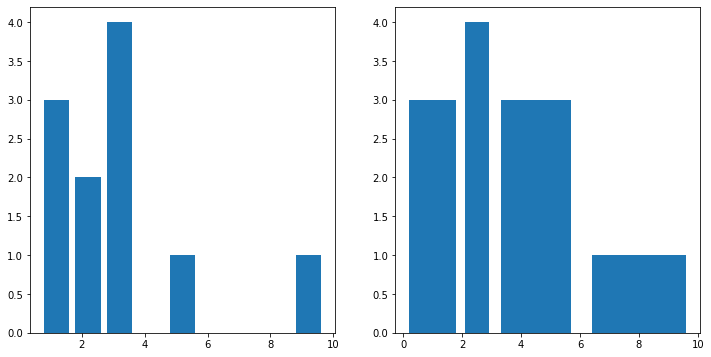

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Vals = np.array([0.7, 1.0, 1.5, 2.3, 2.5, 2.7, 2.9, 3.0, 3.1, 5.5, 9.7])

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
#ax1.hist(Vals, rwidth =0.8)
counts1, bins1, patches = ax1.hist(Vals, bins = 9, rwidth =0.8)
print(bins1)

#You can draw a histogram using the results of np.histogram. 
#counts1, bins1 = np.histogram(Vals)
#ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth=0.8)

#ax2.hist(Vals, rwidth=0.8)
ax2.hist(Vals, bins = [0.0, 2.0, 3.0, 6.0, 10.0], rwidth=0.8)
#============================================ 

plt.show()

## T3. Binomial을 따르는 Random Number Generation 실험

Binomial Random Variable을 따르는 난수를 생성하고 그 결과가 이론과 얼마나 유사한지 비교해 보려한다. 
프로그램의 개괄적 구성은 다음과 같다.
* $n=10, p=0.3$인 Binomial Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* 난수 생성 결과 rvals1과 rvals2에서 Binomial Random Variable이 가질 수 있는 모든 값에 대해 도수 분포를 구하고 비율을 구한다. 예를 들어 전체 100개의 난수 중 0의 값을 가지는 것이 3개라면 0에 대한 도수 분포 비율은 0.03이 된다.
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.
>* histogram의 인자를 조정하여 도수 분포의 비율이 나타나도록 해보라
>* plt.hist() 함수를 사용하는 것이 불편하면 bar graph를 사용하여도 된다. 
>* 이론적인 확률 값 $P_X (k), k \in {0, 1, 2, \cdots, 10}$은 pmf()를 이용하여 구해서 plot() 함수로 표시하였다.

1. 다음 그림과 같은 결과 그래프를 얻도록 주어진 코드를 수정하라. 
2. Title, xlabel, ylabel, legend 등에 유의하라. 
![graph](https://github.com/inetguru/IDS-CB35533/blob/main/bin_rng.png?raw=true)

---
* <font color="blue"> Histogram의 Bins를 설정할 수 있어야 한다.
* density 인자를 활용, density : bool, default: False
>* If False, the result will contain the number of samples in each bin. 
>*If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; **it is not a probability mass function**. *from - numpy.*
>* If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1). *from - matplotlib.*
>* 이 문제에서는 bin의 폭이 1이므로 해당 구간의 확률 값과 같다. 그러나 일반적인 경우는 그렇지 않다. T4. Gaussian 문제해서 확인 </font>
 

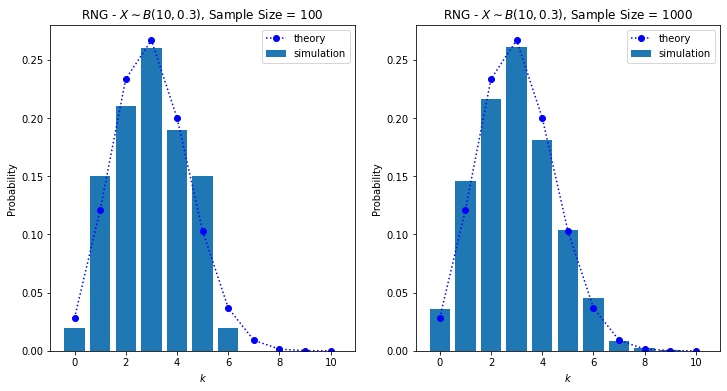

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
n=10
p=0.3
size = 100#@param {type:"integer"}

rv = stats.binom(n,p)
Ks = np.arange(0,n+1)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
ax1.set_title('RNG - $X \sim B({},{})$, Sample Size = {}'.format(n,p,size))
ax1.set_ylabel('Probability')
ax1.set_xlabel('$k$')
ax1.hist(rvals1, np.arange(-0.5, n+1.5, 1), label='simulation', density=True, rwidth = 0.8)
ax1.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')
ax1.legend()

ax2.set_title('RNG - $X \sim B({},{})$, Sample Size = {}'.format(n,p,size*10))
ax2.set_xlabel('$k$')
ax2.set_ylabel('Probability')
ax2.hist(rvals2,np.arange(-0.5, n+1.5, 1), label='simulation', density=True, rwidth = 0.8)
ax2.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')
ax2.legend()
#============================================ 

plt.show()

## T4. Gaussian을 따르는 Random Number Generation 실험
Gaussian Random Variable을 따르는 난수를 생성하고 그 결과가 이론과 얼마나 유사한지 비교해 보려한다. 
프로그램의 개괄적 구성은 다음과 같다.
* $\mu=0, \sigma=1$인 Standard Normal Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* bins = np.linspace(-4\*sigma, 4\*sigma, 41)로 [-4\*sigma, 4\*sigma]의 구간을 40개의 bins로 구분하여 난수의 도수 분포를 구한다. 
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.
>* 개별 bins 폭이 1이 아니라서 histogram 함수 인자의 단순 조절만으로는 도수 분포 비율을 얻기는 어려움에 유의하라. 
>* plt.hist() 함수를 사용하는 것이 불편하면 bar graph를 사용하여도 된다. 
>* 이론적인 확률 값은 개별 cdf()를 이용해서 각 bins 구간별 확률을 구하였고 이를 plot() 함수로 표시하였다. 

1. 다음 그림과 같은 결과 그래프를 얻도록 주어진 코드를 수정하라. 
2. Title, xlabel, ylabel, legend 등을 포함하라. 
![graph](https://github.com/inetguru/IDS-CB35533/blob/main/gaussian_rng.png?raw=true)

---

* <font color="blue"> Histogram의 density 인자를 True로 변경하면 원하는 결과를 얻을 수 있을 것으로 기대했다면 그 기대가 틀렸음을 확인할 수 있는 예제이다.
>* density 인자의 의미를 Reference를 통해 다시 확인하기 바란다.
>* 이러한 예를 보면 Library가 제공하는 기능에 한계가 있고 때로 어떤 기능들은 직접 처리할 수 밖에 없음을 인식하게 된다.
>* 기술적으로 가치를 가지는 문제라기 보다는 Library의 한계를 인식하며, 프로그래밍에서는 이렇게 작은 문제가 프로그래머를 괴롭힐 수 있다는 점도 인식하기 바란다. </font>

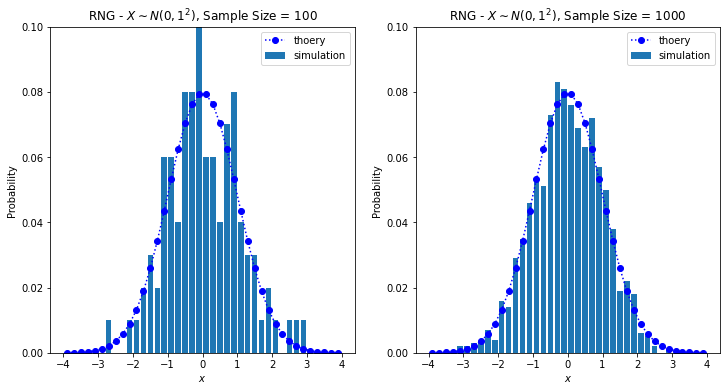

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
mu = 0
sigma = 1

size = 100#@param {type:"integer"}

rv = stats.norm(mu,sigma)
bins = np.linspace(-4*sigma, 4*sigma, 41)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
ax1.set_title('RNG - $X \sim N({},{}^2)$, Sample Size = {}'.format(mu,sigma,size))
ax1.set_ylabel('Probability')
ax1.set_xlabel('$x$')
ax1.set_ylim(0,0.1)
counts1, bins1 = np.histogram(rvals1, bins=bins)
counts1 = counts1/sum(counts1)
ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth = 0.8, label='simulation')
#ax1.hist(rvals1,bins=bins, label='sample', density=True, rwidth = 0.8)
ax1.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax1.legend()

ax2.set_title('RNG - $X \sim N({},{}^2)$, Sample Size = {}'.format(mu,sigma,size*10))
ax2.set_xlabel('$x$')
ax2.set_ylabel('Probability')
ax2.set_ylim(0,0.1)
counts2, bins2 = np.histogram(rvals2, bins=bins)
counts2 = counts2/sum(counts2)
ax2.hist(bins2[:-1], bins2, weights=counts2, rwidth = 0.8, label='simulation')
ax2.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax2.legend()

#============================================ 

plt.show()

## T5. Central Limit Theorem Simulation
이 문제에서는 중심극한정리(Central Limit Theorem)의 유효성을 Simulation을 통해 확인해 보려한다.

* $\lambda=2$인 Exponential Distribution을 따르는 표본을 난수 발생기를 이용하여 생성한다.
* 각 표본 크기는 n_sample이며 우리는 이러한 표본을 n_exp만큼 생성하고자 한다. 즉 rvs(n_sample \* n_exp)를 호출하여 n_sample \* n_exp 만큼의 난수를 생성한다.
* [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp) 를 이용하여 생성한 난수들을 표본 크기가 n_sample인 n_exp개의 표본으로 변형한 2차원 배열 rval_array로 저장한다.
* 개별 표본의 표본평균(Sample Mean)을 구하여 xbars에 저장하였다.
* 우리는 이 표본평균의 분포에 근사하는 정규분포를 위한 변수인 g_rv를 만들려고 한다. 
* 우리는 결과를 그래프를 통해 확인하려한다. 
* ax1에는 생성한 난수 값 전체(개수 : n_sample * n_exp)의 분포를 exponential 분포의 이론적 확률값과 비교하여 표시한다.
* ax2에는 표본 평균의 분포를 표시하는데 표본 평균 $\bar X$ 의 도수 분포 비율을 histogram으로 표시하고 이에 근사하는 정규 분포의 확률값을 함께 표현하려 하였다. 

1. Central Limit Theorem에 따라 Sample Mean, $\bar X$의 분포를 위한 정규분포 g_rv의 인자를 알맞게 설정하라. 인자를 적절히 설정하면 결과가 n_sample = 5 인 상황에서 결과가 아래 그래프와 유사할 것이다.
2. ax1에서 확인할 수 있는 난수 전체의 분포는 정규분포와 전혀 닮지 않았다. ax2에서 확인할 수 있는 Sample Mean의 분포는 어떠한가? n_sample 값을 바꿔가며 n_sample 크기가 결과에 미치는 영향을 이해해 보라. (별도로 설명을 덧붙일 필요는 없음. 평가의 관점에서는 위 1.만 수행하면 됨)

![graph](https://github.com/inetguru/IDS-CB35533/blob/main/central.png?raw=true)

---
* <font color="blue"> Central Limit Theorem을 이해하고 있는지를 확인하는 문제이다.
* 충분히 큰 sample 수 $n$에 대해 Sample Mean의 Distribution은 평균 Popuplation Mean $\mu_X$, 표준편차가 Population의 standard deviation을 $\sqrt n$으로 나눈 값을 갖는 Normal Distribution을 따른다. 즉 $\sim N (\mu=\mu_X, \sigma = \frac{\sigma_X }{\sqrt{n}})$
* Population은 $\lambda=2$인 exponential 분포이다. exponential()의 평균과 표준편차의 이론 값($\mu_X = 1/\lambda, \sigma_X = 1/\lambda$)을 사용하여도 되고 Library에서 제공하는 함수 mean(), std()를 이용하여도 된다. 
</font>  

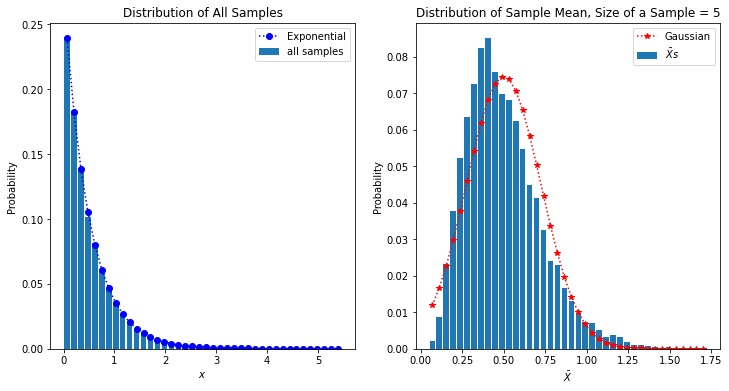

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

np.random.seed(seed=1000)
n_sample = 5 #@param {type:"integer"}
n_exp = 10000
Rate = 2

s_rv = stats.expon(scale = 1/Rate)

#========== SET THE PARAMETERS PROPERLY ================= 
#g_rv = stats.norm(0,s_rv.std())
g_rv = stats.norm(s_rv.mean(),s_rv.std()/math.sqrt(n_sample))
#g_rv = stats.norm(1/Rate,(1/Rate)/math.sqrt(n_sample))
#========================================================

rval_array = s_rv.rvs(n_sample * n_exp).reshape((n_exp, n_sample))
xbars = rval_array.mean(1)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

counts1, bins1 = np.histogram(rval_array,40)
counts1 = counts1/sum(counts1)
ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth = 0.8, label='all samples')
ax1.plot((bins1[1:]+bins1[:-1])/2, s_rv.cdf(bins1[1:])-s_rv.cdf(bins1[:-1]), "b:o", label='Exponential')
ax1.set_title('Distribution of All Samples')
ax1.set_xlabel('$x$')
ax1.set_ylabel('Probability')
ax1.legend()

counts2, bins2 = np.histogram(xbars, 40)
counts2 = counts2/sum(counts2)
ax2.hist(bins2[:-1], bins2, weights=counts2, rwidth = 0.8, label='$\\bar{X}s$')
ax2.plot((bins2[1:]+bins2[:-1])/2, g_rv.cdf(bins2[1:])-g_rv.cdf(bins2[:-1]), "r:*", label='Gaussian')
ax2.set_title('Distribution of Sample Mean, Size of a Sample = {}'.format(n_sample))
ax2.set_xlabel('$\\bar{X}$')
ax2.set_ylabel('Probability')
ax2.legend()

plt.show()
